In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import torch
import sys
from models import FeatureMapper,Kitsune,TinyAutoEncoder,RMSELoss
from torch import nn
sys.path.append('../../deepaid/')
X_train = np.load('data/train_benign_feat.npy')
normalized_train_data = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
normalized_train_data = torch.from_numpy(normalized_train_data,).to(torch.float32)
print(normalized_train_data.shape)

torch.Size([50000, 100])


In [3]:
max_val, min_val= np.max(X_train,axis=0), np.min(X_train, axis=0)

In [4]:
from torch.utils.data import Dataset, DataLoader
class MyDateset(Dataset):
    def __init__(self,dataset):
                self.data = dataset

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
#前4096个数据用来构造FM    
mapper_data = MyDateset(normalized_train_data[:4096])
mp_dateloader = DataLoader(mapper_data, batch_size=64,shuffle=True)
fm = FeatureMapper(100,10) #feature dim 为100，一个cluster的最大feature数为10
for batch in mp_dateloader:
    fm.parital_fit(batch)
#FM构造完成
print(f'feature mapper is done: {fm.clusters_}')
print(f'the format of featuremapper is {[len(i) for i in fm.clusters_]}')

feature mapper is done: [[6, 0, 3, 9, 12, 74, 77, 71, 65, 68], [27, 62, 24, 59, 21, 56, 15, 50, 18, 53], [45, 49, 41, 33, 37], [92, 96, 88, 80, 84], [61, 58, 52, 55, 64, 63, 60, 57, 51, 54], [91, 90, 82, 86, 83, 87, 73, 67, 70], [11, 14, 42, 46, 39, 31, 35], [48, 44, 23, 17, 20, 26, 29, 40, 32, 36], [8, 2, 5, 38, 30, 34], [93, 97, 72, 66, 69, 75, 78, 89, 81, 85], [25, 28, 22, 16, 19], [76, 79, 95, 99], [94, 98, 10, 13], [1, 4, 7, 43, 47]]
the format of featuremapper is [10, 10, 5, 5, 10, 9, 7, 10, 6, 10, 5, 4, 4, 5]


In [64]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
leaf_node1 = [str(i) for i in range(100)]
leaf_node = [[str(i) for i in x] for x in fm.clusters_ ]
cluter_node = ['cluster'+ str(i) for i in range(14)]
G = nx.DiGraph()
G.add_nodes_from(leaf_node1)
G.add_nodes_from(cluter_node)
G.add_node('root')
edge1 = [(cluter, leaf)  for cluter, _ in zip(cluter_node, leaf_node) 
         for leaf in _]
print(edge1)
edge2 = [('root', cluster) for cluster in cluter_node]
print(edge2)
G.add_edges_from(edge1)
G.add_edges_from(edge2)
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=20, node_color='red', arrows=False,font_size=8)
plt.show()

[('cluster0', '6'), ('cluster0', '0'), ('cluster0', '3'), ('cluster0', '9'), ('cluster0', '12'), ('cluster0', '74'), ('cluster0', '77'), ('cluster0', '71'), ('cluster0', '65'), ('cluster0', '68'), ('cluster1', '27'), ('cluster1', '62'), ('cluster1', '24'), ('cluster1', '59'), ('cluster1', '21'), ('cluster1', '56'), ('cluster1', '15'), ('cluster1', '50'), ('cluster1', '18'), ('cluster1', '53'), ('cluster2', '45'), ('cluster2', '49'), ('cluster2', '41'), ('cluster2', '33'), ('cluster2', '37'), ('cluster3', '92'), ('cluster3', '96'), ('cluster3', '88'), ('cluster3', '80'), ('cluster3', '84'), ('cluster4', '61'), ('cluster4', '58'), ('cluster4', '52'), ('cluster4', '55'), ('cluster4', '64'), ('cluster4', '63'), ('cluster4', '60'), ('cluster4', '57'), ('cluster4', '51'), ('cluster4', '54'), ('cluster5', '91'), ('cluster5', '90'), ('cluster5', '82'), ('cluster5', '86'), ('cluster5', '83'), ('cluster5', '87'), ('cluster5', '73'), ('cluster5', '67'), ('cluster5', '70'), ('cluster6', '11'), ('c

ModuleNotFoundError: No module named 'pydot'

In [5]:
#kitsune 构造完成
kit = Kitsune(fm,0.75,0.2)#paramaters:featuremapper,compression rate, dropout rate
print(kit.tails)
print(kit.head)
ae = kit.tails[0]
print(ae.w.dtype)
print(ae.hidden_bias.dtype)

ModuleList(
  (0): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (1): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (2): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (3): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (4): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (5): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (6): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (7): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (8): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (9): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (10): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (11): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (12): TinyAutoEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (13): TinyAutoEncoder(
    (dropou

In [6]:
train_data = MyDateset(normalized_train_data[4096:].to('cuda:6'))
train_dataload = DataLoader(train_data,shuffle=True,batch_size=64)
print(normalized_train_data[4096].dtype)
reconstructd_data = kit(normalized_train_data[4096])
print(reconstructd_data['tails_losses'].shape, reconstructd_data['head_loss'].shape)
print(kit.score(normalized_train_data[4096]).mean(-1))

torch.float32
torch.Size([100, 14]) torch.Size([100])
tensor(0.0834, grad_fn=<MeanBackward1>)


In [7]:
rmsloss = RMSELoss()
x = torch.arange(4.0)
y = torch.arange(4.0, 8.0)
loss = rmsloss(x,y).mean(-1)
print(loss)

tensor(4.)


In [8]:
import torch.optim as optim
device = torch.device('cuda:6')
optimizer = optim.Adam(params=kit.parameters(),lr=0.00001)
kit.to(device)
kit.train()
kit.zero_grad()
running_tail = 0.0
running_head = 0.0
tail_vec = []
head_vec = []
for epoch in range(1):
    for i,batch in enumerate(train_dataload, start=1):
        
        optimizer.zero_grad()
        losses = kit(batch)
        tail_loss = losses["tails_losses"].sum(-1).mean(0)
        head_loss = losses["head_loss"].mean(0)
        tail_loss.backward()
        head_loss.backward()
        #nn.utils.clip_grad.clip_grad_norm_(kit.parameters(), 2.0)
        optimizer.step()

        running_tail += tail_loss.item()
        running_head += head_loss.item()
        tail_vec.append(running_tail / i)
        head_vec.append(running_head / i)
        if i % 50 == 0:
            tail_loss_mean = running_tail / i
            head_loss_mean = running_head / i
            print(f"🦊 Epoch [{epoch}]  "
                    f"tail losses {tail_loss_mean:.5f}  "
                    f"head loss: {head_loss_mean:.5f}")

🦊 Epoch [0]  tail losses 5.71784  head loss: 0.09174
🦊 Epoch [0]  tail losses 5.71722  head loss: 0.09171
🦊 Epoch [0]  tail losses 5.71706  head loss: 0.09165
🦊 Epoch [0]  tail losses 5.71537  head loss: 0.09170
🦊 Epoch [0]  tail losses 5.71526  head loss: 0.09163
🦊 Epoch [0]  tail losses 5.71568  head loss: 0.09153
🦊 Epoch [0]  tail losses 5.71504  head loss: 0.09151
🦊 Epoch [0]  tail losses 5.71437  head loss: 0.09149
🦊 Epoch [0]  tail losses 5.71364  head loss: 0.09147
🦊 Epoch [0]  tail losses 5.71328  head loss: 0.09143
🦊 Epoch [0]  tail losses 5.71275  head loss: 0.09140
🦊 Epoch [0]  tail losses 5.71228  head loss: 0.09136
🦊 Epoch [0]  tail losses 5.71130  head loss: 0.09137
🦊 Epoch [0]  tail losses 5.71011  head loss: 0.09138


718 718


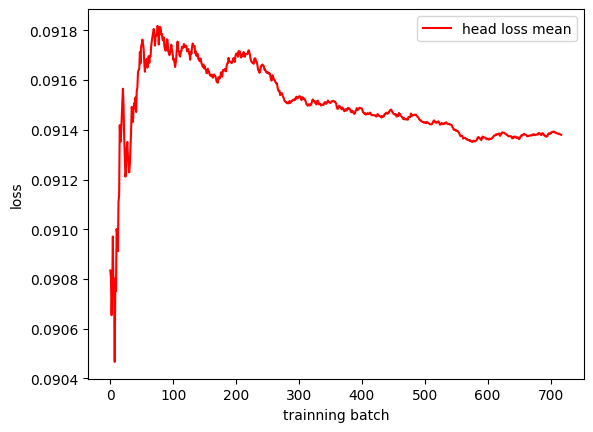

0.0918180006311128


45952

In [9]:
import matplotlib.pyplot as plt
print(len(tail_vec), len(head_vec))
#plt.plot(tail_vec,label='tail loss mean',color='blue')
plt.plot(head_vec,label='head loss mean',color='red')
plt.xlabel('trainning batch')
plt.ylabel('loss')
#plt.title('Line Chart with Multiple Datasets')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
thre = max(head_vec)
print(thre)
718 * 64

In [10]:
#加载test data

test_feat = np.load('./data/test_mirai_ddos.npy')
normalized_test_data = (test_feat - np.min(test_feat, axis=0)) / (np.max(test_feat, axis=0) - np.min(test_feat, axis=0))
normalized_test_data = torch.from_numpy(normalized_test_data,).to(torch.float32)
print(normalized_test_data.shape)
test_data = MyDateset(normalized_test_data.to('cuda:6'))
test_loader= DataLoader(test_data,shuffle=False,batch_size=16)
kit.to(device)
kit.eval()
running_tail = 0.0
running_head = 0.0
tail_vec = []
head_vec = []
for i, batch in enumerate(test_loader,start=1):
    losses = kit(batch)
    #tail_loss = losses["tails_losses"].sum(-1).mean(0)
    head_loss = losses["head_loss"]
    #print(head_loss)
    #break
    head_vec.append(head_loss)
    
    
    #running_tail += tail_loss.item()
    #running_head += head_loss.item()
    #tail_vec.append(running_tail / i)
    #head_vec.append(running_head / i)

#head_loss = torch.cat(head_loss)
len(head_loss)

torch.Size([50000, 100])


16

In [11]:
head_vec = torch.cat(head_vec)
print(head_vec.shape)

torch.Size([50000])


In [12]:
tensor_list = [torch.tensor(list(range(i,i+3))) for i in range(1,9,3)]
print(tensor_list)
cat_tensor = torch.cat(tensor_list)
print(cat_tensor)

[tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8, 9])]
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [13]:
head_vec = [i.detach().cpu() for i in head_vec]
tmp = [1 if i>=thre else 0 for i in head_vec]
acc = float(sum(tmp) / len(tmp))


0.9887


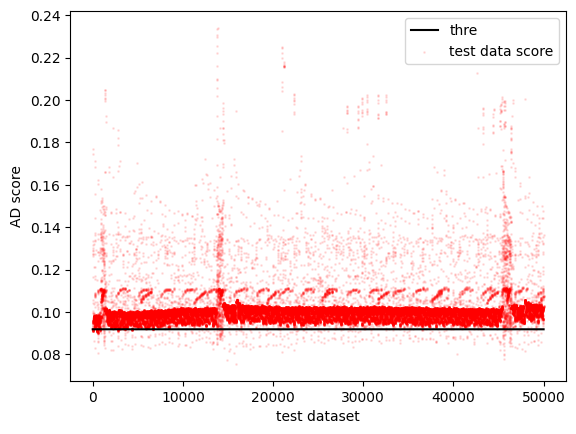

In [65]:

plt.scatter(list(range(len(head_vec))),head_vec,label='test data score',color='red',s=1,alpha=0.1)
plt.plot(list(range(50000)),[thre for i in range(50000)], label='thre', color='black',linestyle='-')
plt.ylabel('AD score')

plt.xlabel('test dataset')
plt.legend()
print(acc)
plt.show()

In [66]:
anomaly = normalized_test_data[np.argsort(head_vec)[-100]]

import sys
from utils import validate_by_rmse, Normalizer
normer = Normalizer(normalized_train_data.shape[-1],online_minmax=True)
sys.path.append("../../deepaid/interpreters/")
from tabular1 import TabularAID
feature_desc = np.load('data/AI_feature_name.npy') # feature_description
my_interpreter = TabularAID(kit,thre,input_size=100,feature_desc=feature_desc)
interpretation,loss_set = my_interpreter(anomaly)
for k, v in interpretation.items():
    print(k,v)



Successfully Initialize <Tabular Interptreter> for Model <Kitsune>
tensor(0.1243, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1241, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1239, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1238, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1236, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1234, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1233, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1231, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1230, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1228, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1227, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1225, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1224, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1223, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1221, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1220, device='cuda:6', grad_fn=<AddBackward0>)
tensor(0.1218, device='cuda:6', grad_

In [68]:
print(anomaly)

tensor([2.1143e-02, 7.1012e-01, 5.9643e-04, 1.5621e-02, 7.7198e-01, 7.6405e-04,
        9.7097e-03, 9.1627e-01, 1.1871e-02, 7.7255e-03, 9.8221e-01, 7.1127e-02,
        2.5262e-03, 9.8400e-01, 1.5081e-01, 9.6803e-02, 6.7215e-01, 1.2437e-03,
        8.4225e-02, 6.7221e-01, 1.7378e-03, 9.5904e-02, 6.8558e-01, 2.4896e-02,
        4.0765e-01, 7.3124e-01, 7.1127e-02, 2.2044e-01, 7.2918e-01, 1.2562e-01,
        5.9010e-01, 6.1267e-01, 5.1421e-01, 7.0644e-01, 5.9189e-01, 6.1644e-01,
        5.4592e-01, 7.3554e-01, 6.1103e-01, 6.7329e-01, 3.6678e-01, 5.4402e-01,
        8.0061e-01, 8.3100e-01, 2.4495e-01, 3.3237e-01, 7.8378e-01, 7.8949e-01,
        6.0182e-01, 7.2058e-01, 9.6803e-02, 3.5474e-04, 3.9314e-04, 8.4225e-02,
        3.5742e-04, 2.5543e-05, 9.5904e-02, 3.4659e-04, 2.7204e-06, 4.0765e-01,
        3.4731e-04, 7.0424e-06, 2.2044e-01, 3.3468e-04, 8.2952e-06, 9.6803e-02,
        6.7217e-01, 2.7856e-03, 8.4225e-02, 6.7247e-01, 3.9547e-03, 9.5941e-02,
        6.8833e-01, 6.3904e-02, 4.2655e-

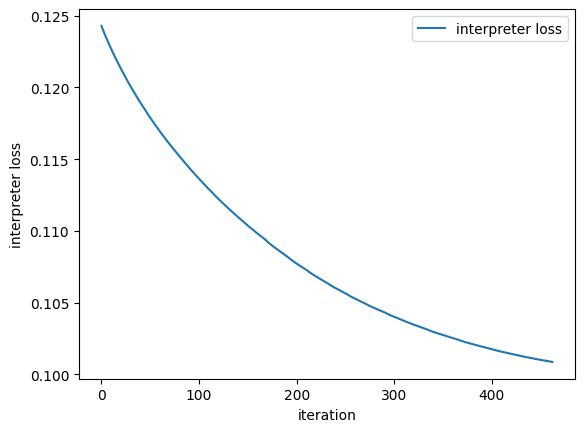

In [67]:
plt.plot(list(range(len(loss_set))), loss_set,label='interpreter loss')
plt.xlabel('iteration')
plt.ylabel('interpreter loss')
plt.legend()
plt.show()

In [16]:
from models import TinyAutoEncoder

net = TinyAutoEncoder(in_features=100)
data = normalized_train_data[0]
re_feat = net(data)
print(re_feat.shape)


torch.Size([100])


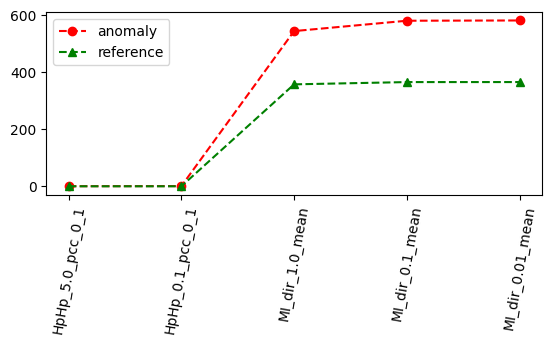

In [18]:
index_inc = interpretation['index_inc']
value_inc = interpretation['value_inc']
part_feature_desc = feature_desc[index_inc]
x = list(range(5))
min_val,max_val = min_val[index_inc], max_val[index_inc]
reference = value_inc*(max_val-min_val)+min_val
anomaly = anomaly[index_inc]*(max_val-min_val)+min_val
plt.plot(x,anomaly,'ro--',label='anomaly')
plt.plot(x,reference,'g^--',label='reference')
plt.xticks(x, part_feature_desc, rotation='80')
plt.legend()
plt.subplots_adjust(bottom=0.5)
plt.show()

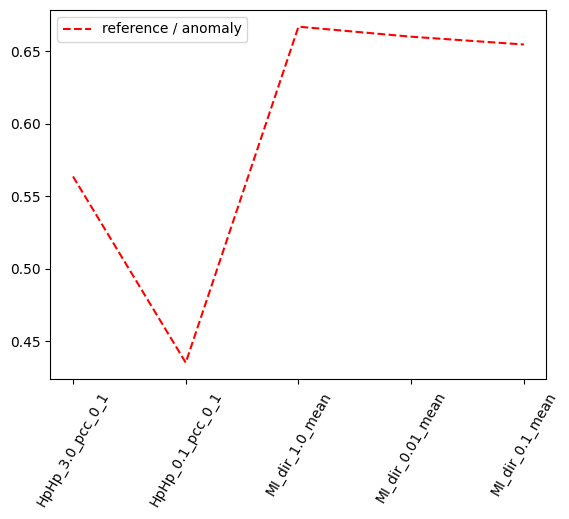

In [ ]:
per = reference / anomaly
plt.plot(x,per,'r--',label='reference / anomaly')
plt.xticks(x, part_feature_desc, rotation='60')
plt.legend()
plt.show()

In [19]:
print(part_feature_desc)

['HpHp_5.0_pcc_0_1' 'HpHp_0.1_pcc_0_1' 'MI_dir_1.0_mean' 'MI_dir_0.1_mean'
 'MI_dir_0.01_mean']
